# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

1. `n_estimators` - nr. of trees to estimate in the forest. Many tree will result in more accurate models than fewer trees, but at the expense of computational power.
2. `max_depth` - how deep the trees are allowed to go (pruning): If max_depth is not regulated or too high, chances are that the model will overfit, and not be able to predict out-of-sample data very well. If max_depth is too low, both the in-sample and out-of-sample predictions would be sub-optimal --> Too much bias in the model.
3. `max_features` - number of included features in the bootstrap sample - if `None`, all features will be included, when looking for the best split.  
4. `bootstrap` - Whether bootstrap samples are used when building the forest. If `False`, the whole datset is used to build each tree.

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

Answer: `max_features = None` & `bootstrap = False`, as that would mean that all the trees are trained on the same observations and features (the same data).

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

# 3.1.2.1

In [29]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

# Import packages for reproduction of the 4 different methods of dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP
# UMAP needs to be installed: !conda install -c conda-forge umap-Learn -y

# Create function for dimensionality reduction with standardization
def plotDimensionReduction(reducer, X, y, ax):
    ssc = StandardScaler()
    X_std = ssc.fit_transform(X) # Standardizing the features.
    
    if reducer == LDA:
        dmap = reducer().fit_transform(X_std, y) # <-- LDA is supervised, and needs the class labels
    else:
        dmap = reducer().fit_transform(X_std)
    
    d1, d2 = dmap[:,0], dmap[:,1]
    
    ax.scatter(d1, d2, c=y, cmap = 'tab10')
    ax.set_title(reducer.__name__ + " - Standardized")

Answer 3.1.2.1: Reproduction on the digit dataset

/Users/Esben/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


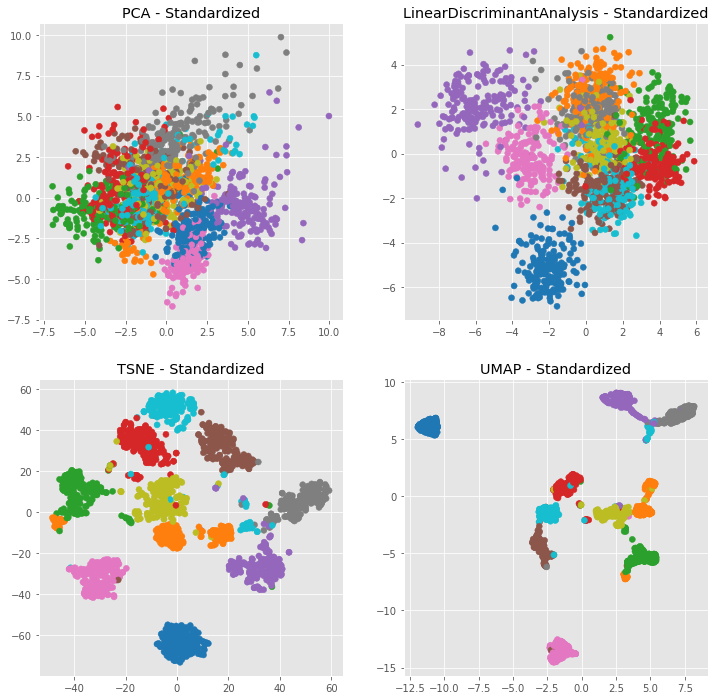

In [17]:
fig, ax = plt.subplots(2,2, figsize = (12,12))

plotDimensionReduction(PCA, X_digits, y_digits, ax[0][0])
plotDimensionReduction(LDA, X_digits, y_digits, ax[0][1])
plotDimensionReduction(TSNE, X_digits, y_digits, ax[1][0])
plotDimensionReduction(UMAP, X_digits, y_digits, ax[1][1])

# 3.1.2.2

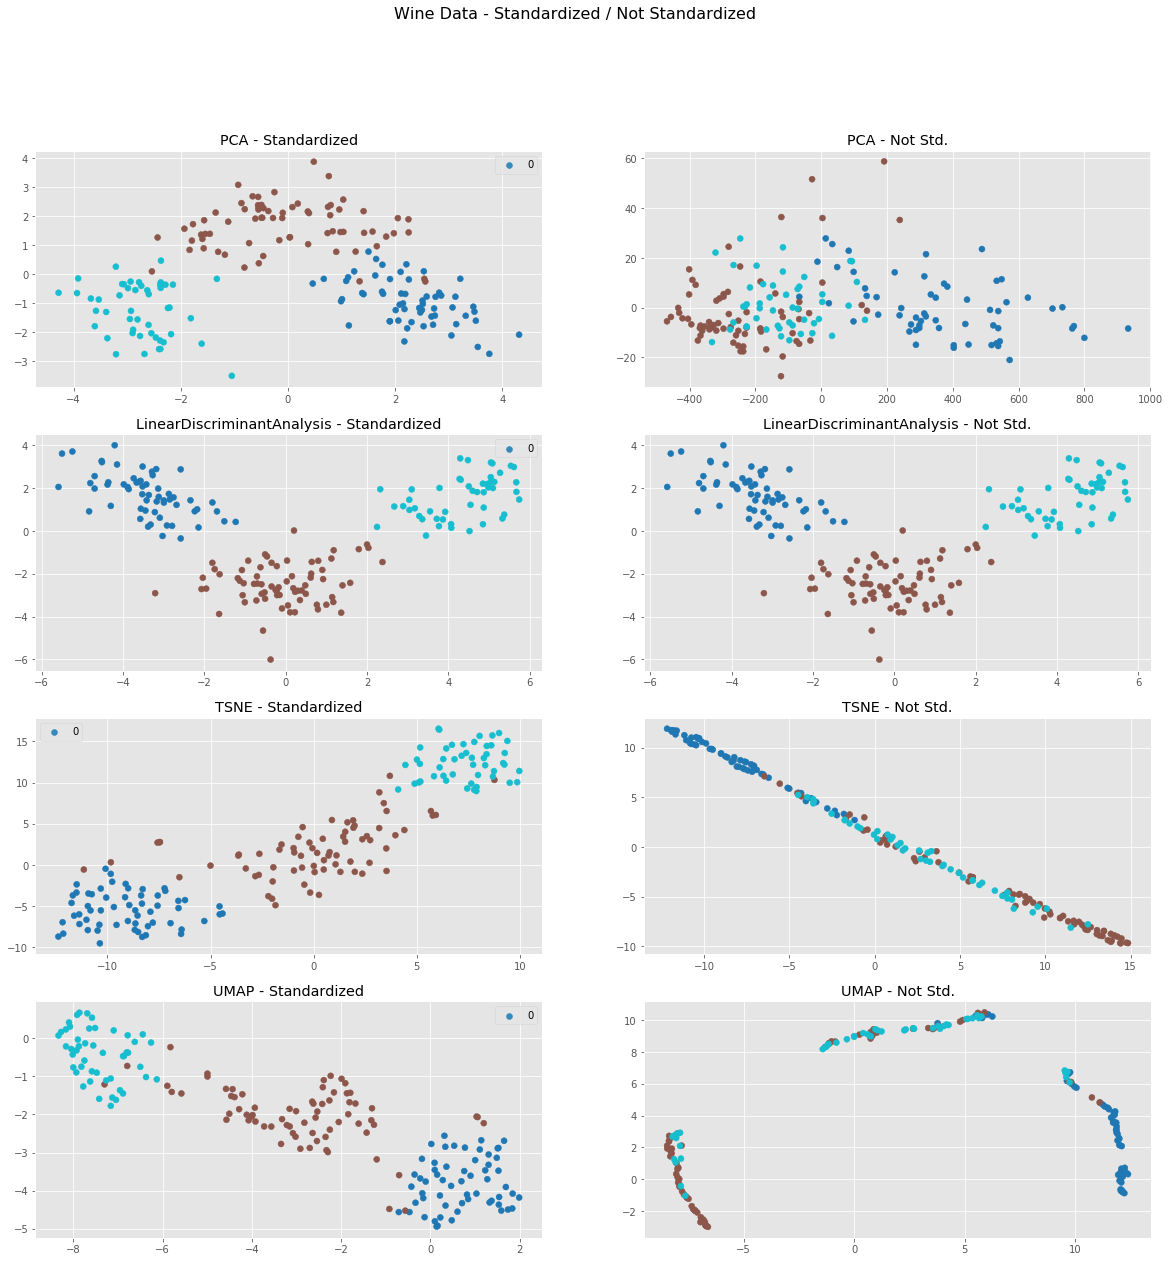

In [30]:
# Create func that doesnt standardize. 
def plotDimensionReduction_noscale(reducer, X, y, ax):
    if reducer == LDA:
        dmap = reducer().fit_transform(X, y)
    else:
        dmap = reducer().fit_transform(X)
    
    d1, d2 = dmap[:,0], dmap[:,1]
    
    ax.scatter(d1, d2, c=y, cmap = 'tab10')
    ax.set_title(reducer.__name__ + " - Not Std.")
    
#Import wine
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

#Plot of wine with stadardization:
fig, ax = plt.subplots(4,2, figsize = (20,20))
fig.suptitle('Wine Data - Standardized / Not Standardized', fontsize=16)
#PCA
plotDimensionReduction(PCA, X_wine, y_wine, ax[0][0])
plotDimensionReduction_noscale(PCA, X_wine, y_wine, ax[0][1])
#LDA
plotDimensionReduction(LDA, X_wine, y_wine, ax[1][0])
plotDimensionReduction_noscale(LDA, X_wine, y_wine, ax[1][1])
#TSNE
plotDimensionReduction(TSNE, X_wine, y_wine, ax[2][0])
plotDimensionReduction_noscale(TSNE, X_wine, y_wine, ax[2][1])
#UMAP
plotDimensionReduction(UMAP, X_wine, y_wine, ax[3][0])
plotDimensionReduction_noscale(UMAP, X_wine, y_wine, ax[3][1])

**Answer 3.1.2.2**: If we do not standardize on the wine data, the different classes a not seperated very well for PCA, TSNE and UMAP. On the other hand, once we standardize, the class-seperation is somewhat satisfactory. Standardization is not an issue with the digits dataset, since the features are on the same scale. 

# 3.1.2.3

**Answer 3.1.2.3**: We observe that PCA and LDA are good at seperating the classes on the wine-dataset, as opposed to their more messy class seperation on the digits dataset. This could be due to the fact that PCA and LDA perform best when the initial dimensionallity of the input-data is not too high. The wine-data is 13-dimensional, while the digits-data is 64-dimensional. Thus we see that PCA and LDA performs well in the lower-dimensional wine-data and less well on the high-dimensional digits data. On the contrary, UMAP and TSNE perform well at seperating the classes on both the datasets. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

**Answer 4.2.1**: Athey and Imbens defines a model as 'honest' if it `does not use the same information for selecting the model structure (the partition of the covariate space) as for estimation given a model structure`. To estimate an honest tree in practice, half of the sample data should then be used to train the tree in how to partition the data (which features to split on) and half of the sampling data should be used to estimate the local treatment effects in each of the partion groups (that is, within each leaf in the model). The intuition is similar to the intuition behind splitting into train and test.